In [13]:
import torch.nn as nn
import torch
import pdb

import sys, os
import random
import numpy as np
from shutil import copy
import matplotlib.pyplot as plt
from copy import deepcopy

from omegaconf import OmegaConf
import shutil
import pickle
import random
from tqdm import tqdm
import torch.nn.functional as F
from collections import defaultdict

In [14]:
# run_path = '/home/harishbabu/projects/PIPNet/runs/010-CUB-27-imgnet_OOD_cnext26_img=224_nprotos=20'
# run_path = '/home/harishbabu/projects/PIPNet/runs/031-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = '/home/harishbabu/projects/PIPNet/runs/032-CUB-18-imgnet_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/035-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'

# run_path = '/home/harishbabu/projects/PIPNet/runs/043-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel'
# run_path = "/home/harishbabu/projects/PIPNet/runs/036-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel_uniformity"
# run_path = "/home/harishbabu/projects/PIPNet/runs/041-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/042-035_clone-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/044-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=20-or-4per-desc_orth-on-rel"

# run_path = "/home/harishbabu/projects/PIPNet/runs/046-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=10per-desc_orth-on-rel"
# run_path = "/home/harishbabu/projects/PIPNet/runs/047-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc"
# run_path = "/home/harishbabu/projects/PIPNet/runs/048-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=5per-desc_tanh-desc_unit-sphere"
# run_path = "/home/harishbabu/projects/PIPNet/runs/051-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/052-CUB-18-imgnet_OOD_cnext26_img=224_nprotos=4per-desc_tanh-desc_unit-sphere_AW=5-TW=2-UW=2-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/055-CUB-18_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/056-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/057-CUB-18-imgnet_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"
# run_path = "/home/harishbabu/projects/PIPNet/runs/058-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2"

# with unit sphere
# run_path = "/home/harishbabu/projects/PIPNet/runs/059-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# unit sphere with softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/065-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# original hpipnet with 20 protos per node no KO, no OOD, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/062-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD"

# original hpipnet with 20 protos per node no KO, no OOD, WITH tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/063-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20_no-KO_no-OOD_tanh-desc"

# with unit sphere but no AL+UNI
# run_path = "/home/harishbabu/projects/PIPNet/runs/066-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere_finetune=5_no-meanpool_no-softmax_no-align_no-uni_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, with softmax, no tanh-desc, INCORRECT
# run_path = "/home/harishbabu/projects/PIPNet/runs/067-incorrect-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# with unit sphere, protopool, no softmax, no tanh-desc
# run_path = "/home/harishbabu/projects/PIPNet/runs/068-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_no-softmax_AW=3-TW=2-UW=3-CW=2_batch=20"

# 071 with bias
# run_path = "/home/harishbabu/projects/PIPNet/runs/071-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_with-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 072 gumbel softmax, tau=0.5
# run_path = "/home/harishbabu/projects/PIPNet/runs/072-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-gumbel-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 074 multiply_cs_softmax
# run_path = "/home/harishbabu/projects/PIPNet/runs/074-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-desc_unit-sphere-protopool_finetune=5_no-meanpool_with-softmax_multi-cs-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 077 unit sphere protopool with cosin no softmax constant 20 protos per node
# run_path = "/home/harishbabu/projects/PIPNet/runs/077_CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=20-sphere-protopool_finetune=5_align-pf-during-training_no-meanpool_no-softmax_no-addon-bias_AW=3-TW=2-UW=3-CW=2_batch=20"

# 082 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/082-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 083 unit sphere cs followed by softmax with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/083-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_no-align_no-uni_no-mm-loss_batch=48"

# 085 unit sphere cs followed by softmax-with-tau with minmazimize loss
# run_path = "/home/harishbabu/projects/PIPNet/runs/085-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=48"

# 085 unit sphere cs followed by softmax-with-tau with minmazimize loss
run_path = "/home/harishbabu/projects/PIPNet/runs/085-notebook-CUB-18-imgnet_with-equalize-aug_cnext26_img=224_nprotos=4per-leaf-desc_unit-sphere_finetune=5_no-meanpool_with-softmax-tau=0.2_no-addon-bias_AW=3-TW=2-MMW=2-UW=3-CW=2_mm-loss_batch=12"
try:
    sys.path.remove('/home/harishbabu/projects/PIPNet')
except:
    pass
sys.path.insert(0, os.path.join(run_path, 'source_clone'))


In [15]:
from pipnet.pipnet import PIPNet, get_network
from util.log import Log
from util.args import get_args, save_args, get_optimizer_nn
from util.data import get_dataloaders
from util.func import init_weights_xavier
from pipnet.train import train_pipnet, test_pipnet
# from pipnet.test import eval_pipnet, get_thresholds, eval_ood
from util.eval_cub_csv import eval_prototypes_cub_parts_csv, get_topk_cub, get_proto_patches_cub
from util.vis_pipnet import visualize, visualize_topk
from util.visualize_prediction import vis_pred, vis_pred_experiments
from util.node import Node
from util.phylo_utils import construct_phylo_tree, construct_discretized_phylo_tree
from util.func import get_patch_size
from util.data import ModifiedLabelLoader

In [16]:
from PIL import Image
import numpy as np
import pdb

def get_heatmap(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1])))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    
    return np.array(result_image)


def get_heatmap_uninterpolated(latent_activation, input_image):
    image_a = latent_activation.cpu().numpy()
    image_a = (image_a - image_a.min()) / (image_a.max() - image_a.min())

    input_image = (input_image - input_image.min()) / (input_image.max() - input_image.min())
    image_b = input_image.permute(1, 2, 0).cpu().numpy()
    
    reshaped_image_a = np.array(Image.fromarray((image_a[0] * 255).astype('uint8')).resize((input_image.shape[-1], input_image.shape[-1]), \
                                                                                          resample=Image.NEAREST ))
    normalized_heatmap = (reshaped_image_a - np.min(reshaped_image_a)) / (np.max(reshaped_image_a) - np.min(reshaped_image_a))
    
    heatmap_colormap = plt.get_cmap('jet')
    heatmap_colored = heatmap_colormap(normalized_heatmap)
    
    heatmap_colored_uint8 = (heatmap_colored[:, :, :3] * 255).astype(np.uint8)
    image_a_heatmap_pillow = Image.fromarray(heatmap_colored_uint8)
    image_b_pillow = Image.fromarray((image_b * 255).astype('uint8'))
    
    result_image = Image.blend(image_b_pillow, image_a_heatmap_pillow, alpha=0.3)
    ## Load Model
    return np.array(result_image)

## Load Model

In [17]:
args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
args = pickle.load(args_file)

if args.phylo_config:
    phylo_config = OmegaConf.load(args.phylo_config)

if args.phylo_config:
    # construct the phylo tree
    if phylo_config.phyloDistances_string == 'None':
        if '031' in run_path: # this run uses a different phylogeny file that had an extra root node which is a mistake
            root = construct_phylo_tree('/home/harishbabu/data/phlyogenyCUB/18Species-with-extra-root-node/1_tree-consensus-Hacket-18Species-modified_cub-names_v1.phy')
        else:
            root = construct_phylo_tree(phylo_config.phylogeny_path)
        print('-'*25 + ' No discretization ' + '-'*25)
    else:
        root = construct_discretized_phylo_tree(phylo_config.phylogeny_path, phylo_config.phyloDistances_string)
        print('-'*25 + ' Discretized ' + '-'*25)
else:
    # construct the tree (original hierarchy as described in the paper)
    root = Node("root")
    root.add_children(['animal','vehicle','everyday_object','weapon','scuba_diver'])
    root.add_children_to('animal',['non_primate','primate'])
    root.add_children_to('non_primate',['African_elephant','giant_panda','lion'])
    root.add_children_to('primate',['capuchin','gibbon','orangutan'])
    root.add_children_to('vehicle',['ambulance','pickup','sports_car'])
    root.add_children_to('everyday_object',['laptop','sandal','wine_bottle'])
    root.add_children_to('weapon',['assault_rifle','rifle'])
    # flat root
    # root.add_children(['scuba_diver','African_elephant','giant_panda','lion','capuchin','gibbon','orangutan','ambulance','pickup','sports_car','laptop','sandal','wine_bottle','assault_rifle','rifle'])
root.assign_all_descendents()

exp_no = int(os.path.basename(run_path)[:3])

if exp_no < 77:
    if ('num_protos_per_descendant' in args) and (args.num_protos_per_descendant > 0):
        for node in root.nodes_with_children():
            node.set_num_protos(args.num_protos_per_descendant)
else:
    # update num of protos per node based on num_protos_per_descendant
    if args.num_features == 0 and args.num_protos_per_descendant == 0:
        raise Exception('Either of num_features or num_protos_per_descendant must be greater than zero')
    for node in root.nodes_with_children():
        node.set_num_protos(num_protos_per_descendant=args.num_protos_per_descendant,\
                            min_protos=args.num_features,\
                            split_protos=('protopool' in args) and (args.protopool == 'n'))

------------------------- No discretization -------------------------


In [18]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    device_ids = [torch.cuda.current_device()]
else:
    device = torch.device('cpu')
    device_ids = []

args_file = open(os.path.join(run_path, 'metadata', 'args.pickle'), 'rb')
args = pickle.load(args_file)

# ckpt_file_name = 'net_overspecific_pruned_replaced_thresh=0.5_last'
ckpt_file_name = 'net_trained_last'
# ckpt_file_name = 'net_trained_10'
# ckpt_file_name = 'net_pretrained'
epoch = ckpt_file_name.split('_')[-1]

ckpt_path = os.path.join(run_path, 'checkpoints', ckpt_file_name)
checkpoint = torch.load(ckpt_path, map_location=device)

if ckpt_file_name != 'net_trained_last':
    print('\n', (10*'-')+'WARNING: Not using the final trained model'+(10*'-'), '\n')

# Obtain the dataset and dataloaders
trainloader, trainloader_pretraining, trainloader_normal, trainloader_normal_augment, projectloader, testloader, test_projectloader, classes = get_dataloaders(args, device)
if len(classes)<=20:
    if args.validation_size == 0.:
        print("Classes: ", testloader.dataset.class_to_idx, flush=True)
    else:
        print("Classes: ", str(classes), flush=True)

# Create a convolutional network based on arguments and add 1x1 conv layer
feature_net, add_on_layers, pool_layer, classification_layers, num_prototypes = get_network(len(classes), args, root=root)
   
# Create a PIP-Net
net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )
net = net.to(device=device)
net = nn.DataParallel(net, device_ids = device_ids)    
net.load_state_dict(checkpoint['model_state_dict'],strict=True)
net.eval()
criterion = nn.NLLLoss(reduction='mean').to(device)

# Forward one batch through the backbone to get the latent output size
# with torch.no_grad():
#     xs1, _, _ = next(iter(trainloader))
#     xs1 = xs1.to(device)
#     proto_features, _, _ = net(xs1)
#     wshape = proto_features['root'].shape[-1]
#     args.wshape = wshape #needed for calculating image patch size
#     print("Output shape: ", proto_features['root'].shape, flush=True)
    
args.wshape = 26

Dropping 0 samples from trainloader
Dropping 0 samples from trainloader_pretraining
Dropping 0 samples from trainloader_normal
Dropping 0 samples from trainloader_normal_augment
Num classes (k) =  18 ['cub_001_Black_footed_Albatross', 'cub_002_Laysan_Albatross', 'cub_003_Sooty_Albatross', 'cub_004_Groove_billed_Ani', 'cub_023_Brandt_Cormorant'] etc.
Classes:  {'cub_001_Black_footed_Albatross': 0, 'cub_002_Laysan_Albatross': 1, 'cub_003_Sooty_Albatross': 2, 'cub_004_Groove_billed_Ani': 3, 'cub_023_Brandt_Cormorant': 4, 'cub_024_Red_faced_Cormorant': 5, 'cub_025_Pelagic_Cormorant': 6, 'cub_031_Black_billed_Cuckoo': 7, 'cub_032_Mangrove_Cuckoo': 8, 'cub_033_Yellow_billed_Cuckoo': 9, 'cub_045_Northern_Fulmar': 10, 'cub_050_Eared_Grebe': 11, 'cub_051_Horned_Grebe': 12, 'cub_052_Pied_billed_Grebe': 13, 'cub_053_Western_Grebe': 14, 'cub_086_Pacific_Loon': 15, 'cub_100_Brown_Pelican': 16, 'cub_101_White_Pelican': 17}
Number of prototypes:  768
----------Prototypes per descendant: 4----------
A

# Check descendants image count

In [28]:
root.get_node('004+086').descendents

from collections import Counter

# Assuming 'dataloader' is your DataLoader instance that has already been created
dataset = trainloader.dataset.dataset.dataset

# Get the mapping from class indices to names
# This assumes that your dataset has the 'classes' and 'class_to_idx' attributes
# which is the case for many built-in PyTorch datasets
idx_to_class = {v: k for k, v in dataset.class_to_idx.items()}

# Initialize a counter with class names
class_counts = Counter({class_name: 0 for class_name in dataset.classes})

# Iterate over the DataLoader
for *_, targets in trainloader:
    # Convert indices to class names
    targets = targets.numpy() if not isinstance(targets, list) else targets
    class_names = [idx_to_class[idx] for idx in targets]
    class_counts.update(class_names)

# Now class_counts has class names as keys and counts as values
print(class_counts)

Counter({'cub_001_Black_footed_Albatross': 30, 'cub_002_Laysan_Albatross': 30, 'cub_003_Sooty_Albatross': 30, 'cub_004_Groove_billed_Ani': 30, 'cub_023_Brandt_Cormorant': 30, 'cub_024_Red_faced_Cormorant': 30, 'cub_025_Pelagic_Cormorant': 30, 'cub_031_Black_billed_Cuckoo': 30, 'cub_032_Mangrove_Cuckoo': 30, 'cub_033_Yellow_billed_Cuckoo': 30, 'cub_045_Northern_Fulmar': 30, 'cub_050_Eared_Grebe': 30, 'cub_051_Horned_Grebe': 30, 'cub_052_Pied_billed_Grebe': 30, 'cub_053_Western_Grebe': 30, 'cub_086_Pacific_Loon': 30, 'cub_100_Brown_Pelican': 30, 'cub_101_White_Pelican': 30})


# ConvNext checks

In [8]:
import torch
import torchvision

# Load the pre-trained ConvNeXt Tiny model
# model = torchvision.models.convnext_tiny(pretrained=True).cuda()
model = net.module._net

# Define a hook function that will print the shape of the inputs to each layer
def print_shape_hook(module, input, output):
    print(f"{module.__class__.__name__}: {output.shape}")

# Assuming you want to check the output after each stage
# The stages in the ConvNeXt Tiny model are contained in the 'features' module
for name, layer in model.named_children():
    if name == 'features':
        for idx, block in enumerate(layer):
            # Register hook to each block
            block.register_forward_hook(print_shape_hook)

# Turn off gradients as we are not doing training to save computation
with torch.no_grad():
    # Create a dummy input tensor of the correct size
    input_tensor = torch.randn(1, 3, 224, 224).cuda()
    
    # Get the model's output (forward pass) and triggers hooks
    output = model(input_tensor)

# Remove hooks after use if you're going to reuse this model and don't want the prints anymore
# This step is not necessary if the script ends after this since all objects will be deleted anyway


Conv2dNormActivation: torch.Size([1, 96, 56, 56])
Sequential: torch.Size([1, 96, 56, 56])
Sequential: torch.Size([1, 192, 28, 28])
Sequential: torch.Size([1, 192, 28, 28])
Sequential: torch.Size([1, 384, 27, 27])
Sequential: torch.Size([1, 384, 27, 27])
Sequential: torch.Size([1, 768, 26, 26])
Sequential: torch.Size([1, 768, 26, 26])


In [18]:
from collections import OrderedDict

reducer1 = nn.Conv2d(in_channels=768, out_channels=128, \
            kernel_size=1, stride = 1, padding=0, bias=True)

reducer2 = nn.Conv2d(in_channels=768, out_channels=128, \
            kernel_size=1, stride = 1, padding=0, bias=True)

layers = OrderedDict([('convnext', net.module._net), ('reducer', reducer)])
conv_reducer = nn.Sequential(layers).cuda()

# conv_reducer = net.module._net

for name,param in conv_reducer.named_parameters():
    print(name)

convnext.features.0.0.weight
convnext.features.0.0.bias
convnext.features.0.1.weight
convnext.features.0.1.bias
convnext.features.1.0.layer_scale
convnext.features.1.0.block.0.weight
convnext.features.1.0.block.0.bias
convnext.features.1.0.block.2.weight
convnext.features.1.0.block.2.bias
convnext.features.1.0.block.3.weight
convnext.features.1.0.block.3.bias
convnext.features.1.0.block.5.weight
convnext.features.1.0.block.5.bias
convnext.features.1.1.layer_scale
convnext.features.1.1.block.0.weight
convnext.features.1.1.block.0.bias
convnext.features.1.1.block.2.weight
convnext.features.1.1.block.2.bias
convnext.features.1.1.block.3.weight
convnext.features.1.1.block.3.bias
convnext.features.1.1.block.5.weight
convnext.features.1.1.block.5.bias
convnext.features.1.2.layer_scale
convnext.features.1.2.block.0.weight
convnext.features.1.2.block.0.bias
convnext.features.1.2.block.2.weight
convnext.features.1.2.block.2.bias
convnext.features.1.2.block.3.weight
convnext.features.1.2.block.3

In [ ]:
with torch.no_grad():
    # Create a dummy input tensor of the correct size
    input_tensor = torch.randn(1, 3, 224, 224).cuda()
    
    # Get the model's output (forward pass) and triggers hooks
    output = conv_reducer(input_tensor)
    
output.shape

In [30]:
features = net.module._net
layer_infos = "768,384|384,128".split('|')
reducer_layers = [('backbone', features)]
for i, layer_info in enumerate(layer_infos):
    in_channels = int(layer_info.split(',')[0])
    out_channels = int(layer_info.split(',')[1])
    print(in_channels, out_channels)
    reducer = nn.Conv2d(in_channels=in_channels, out_channels=out_channels, \
                kernel_size=1, stride = 1, padding=0, bias=True)
    reducer_layers.append(('stage4_reducer_'+str(i)+'_conv', reducer))
    reducer_layers.append(('stage4_reducer_'+str(i)+'_gelu', nn.GELU()))

features = nn.Sequential(OrderedDict(reducer_layers))

for name,param in features.named_parameters():
    print(name)

768 384
384 128
backbone.features.0.0.weight
backbone.features.0.0.bias
backbone.features.0.1.weight
backbone.features.0.1.bias
backbone.features.1.0.layer_scale
backbone.features.1.0.block.0.weight
backbone.features.1.0.block.0.bias
backbone.features.1.0.block.2.weight
backbone.features.1.0.block.2.bias
backbone.features.1.0.block.3.weight
backbone.features.1.0.block.3.bias
backbone.features.1.0.block.5.weight
backbone.features.1.0.block.5.bias
backbone.features.1.1.layer_scale
backbone.features.1.1.block.0.weight
backbone.features.1.1.block.0.bias
backbone.features.1.1.block.2.weight
backbone.features.1.1.block.2.bias
backbone.features.1.1.block.3.weight
backbone.features.1.1.block.3.bias
backbone.features.1.1.block.5.weight
backbone.features.1.1.block.5.bias
backbone.features.1.2.layer_scale
backbone.features.1.2.block.0.weight
backbone.features.1.2.block.0.bias
backbone.features.1.2.block.2.weight
backbone.features.1.2.block.2.bias
backbone.features.1.2.block.3.weight
backbone.feat

In [31]:
reducer_layers

[('backbone',
  ConvNeXt(
    (features): Sequential(
      (0): Conv2dNormActivation(
        (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
        (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
      )
      (1): Sequential(
        (0): CNBlock(
          (block): Sequential(
            (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
            (1): Permute()
            (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
            (3): Linear(in_features=96, out_features=384, bias=True)
            (4): GELU(approximate='none')
            (5): Linear(in_features=384, out_features=96, bias=True)
            (6): Permute()
          )
          (stochastic_depth): StochasticDepth(p=0.0, mode=row)
        )
        (1): CNBlock(
          (block): Sequential(
            (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
            (1): Permute()
            (2): LayerNorm((96,), eps=1e-0

In [7]:
import torch
import torchvision

# Load the pre-trained ConvNeXt Tiny model
model = torchvision.models.convnext_tiny(pretrained=True).cuda()
# model = net.module._net

# Define a hook function that will print the shape of the inputs to each layer
def print_shape_hook(module, input, output):
    print(f"{module.__class__.__name__}: {output.shape}")

# Assuming you want to check the output after each stage
# The stages in the ConvNeXt Tiny model are contained in the 'features' module
for name, layer in model.named_children():
    if name == 'features':
        for idx, block in enumerate(layer):
            # Register hook to each block
            block.register_forward_hook(print_shape_hook)

# Turn off gradients as we are not doing training to save computation
with torch.no_grad():
    # Create a dummy input tensor of the correct size
    input_tensor = torch.randn(1, 3, 224, 224).cuda()
    
    # Get the model's output (forward pass) and triggers hooks
    output = model(input_tensor)

# Remove hooks after use if you're going to reuse this model and don't want the prints anymore
# This step is not necessary if the script ends after this since all objects will be deleted anyway


/home/harishbabu/.conda/envs/hpnet1/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/harishbabu/.conda/envs/hpnet1/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1`. You can also use `weights=ConvNeXt_Tiny_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Conv2dNormActivation: torch.Size([1, 96, 56, 56])
Sequential: torch.Size([1, 96, 56, 56])
Sequential: torch.Size([1, 192, 28, 28])
Sequential: torch.Size([1, 192, 28, 28])
Sequential: torch.Size([1, 384, 14, 14])
Sequential: torch.Size([1, 384, 14, 14])
Sequential: torch.Size([1, 768, 7, 7])
Sequential: torch.Size([1, 768, 7, 7])


In [9]:
for x in trainloader:
    pdb.set_trace()

> /tmp/ipykernel_128407/3201622953.py(1)<module>()
----> 1 for x in trainloader:
      2     pdb.set_trace()

ipdb> x
[tensor([[[[ 0.0056,  0.0056,  0.0056,  ...,  0.0056,  0.0056,  0.0056],
          [ 0.0056,  0.0056,  0.0056,  ...,  0.0056,  0.0056,  0.0056],
          [ 0.0056,  0.0056,  0.0056,  ...,  0.0056,  0.0056,  0.0056],
          ...,
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
          [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179]],

         [[-0.0049, -0.0049, -0.0049,  ..., -0.0049, -0.0049, -0.0049],
          [-0.0049, -0.0049, -0.0049,  ..., -0.0049, -0.0049, -0.0049],
          [-0.0049, -0.0049, -0.0049,  ..., -0.0049, -0.0049, -0.0049],
          ...,
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0357, -2.0357],
          [-2.0357, -2.0357, -2.0357,  ..., -2.0357, -2.0

ipdb> len(x)
3
ipdb> type(x[0])
<class 'torch.Tensor'>
ipdb> type(x[1])
<class 'torch.Tensor'>
ipdb> type(x[2])
<class 'torch.Tensor'>
ipdb> x[0].shape
torch.Size([20, 3, 224, 224])
ipdb> x[1].shape
torch.Size([20, 3, 224, 224])
ipdb> x[3].shape
*** IndexError: list index out of range
ipdb> x[2].shape
torch.Size([20])
ipdb> x[2]
tensor([13, 15, 13, 14, 12, 12,  8,  0,  0,  1,  9,  6, 12,  1,  5,  8, 16, 16,
        12,  8])
ipdb> q


# Weighted loss

In [15]:
import torch
import torch.nn.functional as F
outputs = torch.randn(10, 3, requires_grad=True)  # batch size of 10, 3 classes
labels = torch.randint(0, 3, (10,))  # batch size of 10

In [20]:
class WeightedCrossEntropyLoss(torch.nn.Module):
    def __init__(self):
        super(WeightedCrossEntropyLoss, self).__init__()

    def forward(self, inputs, targets, weights):
        print('inputs', inputs.shape)
        # Calculate cross entropy loss for each instance without reduction
        batch_loss = F.cross_entropy(inputs, targets, reduction='none')
        print('batch_loss', batch_loss.shape)
        
        # Create a mask based on the targets
        class_mask = F.one_hot(targets, num_classes=inputs.size(1)).type(inputs.dtype)
        
        print('class_mask', class_mask.shape)
        
        print('weights', weights.shape)
        
        # Multiply the loss by the weights vector
        weighted_losses = (batch_loss.unsqueeze(1) * class_mask * weights).sum(dim=1)
        
        print('weighted_losses', weighted_losses.shape)
        
        # Perform the final averaging over the batch
        loss = weighted_losses.mean()
        
        return loss

# Create an instance of the custom loss
custom_loss_function = WeightedCrossEntropyLoss()

# Example model output and target labels
# outputs = torch.randn(10, 3, requires_grad=True)  # batch size of 10, 3 classes
# labels = torch.randint(0, 3, (10,))  # batch size of 10

# Example weights for 3 classes
weights = torch.tensor([0.5, 2.0, 0.5], requires_grad=False)

# Calculate loss
loss = custom_loss_function(outputs, labels, weights)
print(loss)


inputs torch.Size([10, 3])
batch_loss torch.Size([10])
class_mask torch.Size([10, 3])
weights torch.Size([3])
weighted_losses torch.Size([10])
tensor(1.6013, grad_fn=<MeanBackward0>)


In [31]:
num_images_of_each_child = [60, 240]
weights = min(num_images_of_each_child) / torch.tensor(num_images_of_each_child, requires_grad=False)
print(weights)
print(weights.dtype)

tensor([1.0000, 0.2500])
torch.float32


# Freezing weights of dense layer

In [2]:
import torch
import torch.nn as nn

# Define a simple neural network with one dense layer
class MyNetwork(nn.Module):
    def __init__(self):
        super(MyNetwork, self).__init__()
        self.dense = nn.Linear(10, 5)  # Dense layer with 10 inputs and 5 outputs

    def forward(self, x):
        return self.dense(x)

# Instantiate the network
net = MyNetwork()

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Transfer the model to the chosen device (GPU or CPU if GPU is not available)
net.to(device)

# Freeze the first two weights of the dense layer
with torch.no_grad():
    for i in range(2):
        net.dense.weight[i].requires_grad = False

# Transfer the modified weights back to the device
net.dense.weight = net.dense.weight.to(device)

# You can check which parameters are trainable
for name, param in net.named_parameters():
    if param.requires_grad:
        print(f"Trainable: {name} on {param.device}")
    else:
        print(f"Non-trainable: {name} on {param.device}")

# Continue with your training process...


Using device: cuda
Trainable: dense.weight on cuda:0
Trainable: dense.bias on cuda:0


In [4]:
net.dense.weight[0].shape

torch.Size([10])

In [11]:
x = torch.ones((2, 6))
x[0, :0] = -1
x[0, 3:] = -1
x[1, :3] = -1
x[1, 6:] = -1

print(x)

tensor([[ 1.,  1.,  1., -1., -1., -1.],
        [-1., -1., -1.,  1.,  1.,  1.]])


# Focal loss

In [1]:
import torch
from kornia.losses import FocalLoss
from torch.nn import CrossEntropyLoss

In [9]:
# Setup: choose the number of classes and the batch size
num_classes = 2
batch_size = 1
logits = torch.randn(batch_size, num_classes)  # Random predictions
targets = torch.randint(0, num_classes, (batch_size,))  # Random targets

In [48]:
logits = torch.tensor([[-0.1711, -2.7535]]) /5
targets = torch.tensor([1])

In [49]:
print(logits)
print(torch.nn.Softmax()(logits))
print(targets)

tensor([[-0.0342, -0.5507]])
tensor([[0.6263, 0.3737]])
tensor([1])


/tmp/ipykernel_118493/211505851.py:2: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.nn.Softmax()(logits))


In [50]:
fl = FocalLoss(alpha=1, gamma=1., reduction='mean').cuda()
ce = CrossEntropyLoss()

In [51]:
loss = fl(logits, targets)
print(f"Calculated Focal Loss: {loss.item()}")

Calculated Focal Loss: 0.3082667887210846


In [52]:
loss = ce(logits, targets)
print(f"Calculated CE Loss: {loss.item()}")

Calculated CE Loss: 0.9843670129776001


In [7]:
import torch
import kornia.losses as kloss



# Initialize the Focal Loss
focal_loss = kloss.FocalLoss(alpha=0.5, gamma=0, reduction='mean')

# Compute the loss
loss = focal_loss(logits, targets)

print(f"Calculated Focal Loss: {loss.item()}")


Calculated Focal Loss: 0.11310020089149475


In [11]:
ce(logits, targets)

tensor(0.4524)

# General model check

In [7]:
def functional_UnitConv2D(in_features, weight, bias, stride = 1, padding=0):
    normalized_weight = F.normalize(weight.data, p=2, dim=(1, 2, 3)) # Normalize the kernels to unit vectors
    normalized_input = F.normalize(in_features, p=2, dim=1) # Normalize the input to unit vectors
    if bias is not None:
        normalized_bias = F.normalize(bias.data, p=2, dim=0) # Normalize the kernels to unit vectors
    else:
        normalized_bias = None
    return F.conv2d(normalized_input, normalized_weight, normalized_bias, stride=stride, padding=padding)

def findCorrespondingToMax(base, target):
    output, indices = F.max_pool2d(base, kernel_size=(26, 26), return_indices=True)# these are logits
    tensor_flattened = target.view(target.shape[0], target.shape[1], -1)
    indices_flattened = indices.view(target.shape[0], target.shape[1], -1)
    corresponding_values_in_target = torch.gather(tensor_flattened, 2, indices_flattened)
    corresponding_values_in_target = corresponding_values_in_target.view(target.shape[0],\
                                     target.shape[1], 1, 1)
    pooled_target = corresponding_values_in_target
    return pooled_target

def customForwardWithCSandSoftmax(net, xs,  inference=False):
    features = net.module._net(xs) 
    proto_features = {}
    proto_features_cs = {}
    proto_features_softmaxed = {}
    pooled = {}
    pooled_cs = {}
    pooled_softmaxed = {}
    out = {}
    for node in net.module.root.nodes_with_children():
        # this may or may not be cosine similarity based on UniConv2D or Conv2d
        proto_features[node.name] = getattr(net.module, '_'+node.name+'_add_on')(features)
        
        #calculating cosine similarity
        prototypes = getattr(net.module, '_'+node.name+'_add_on')
        proto_features_cs[node.name] = functional_UnitConv2D(features, prototypes.weight, prototypes.bias)

        if net.module.args.softmax == 'y':
            proto_features_softmaxed[node.name] = net.module._softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'
        elif net.module.args.gumbel_softmax == 'y':
            proto_features_softmaxed[node.name] = net.module._gumbel_softmax(proto_features[node.name])
            proto_features[node.name] = proto_features_softmaxed[node.name] # will be overwritten if args.multiply_cs_softmax == 'y'

        if net.module.args.multiply_cs_softmax == 'y':
            proto_features[node.name] = proto_features_cs[node.name] * proto_features_softmaxed[node.name]
        pooled[node.name] = net.module._pool(proto_features[node.name])
        
        # this could be softmax or cosine similarity
        pooled_cs[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_cs[node.name])
        
        pooled_softmaxed[node.name] = findCorrespondingToMax(base=proto_features[node.name], \
                                                     target=proto_features_softmaxed[node.name])

        if inference:
            pooled[node.name] = torch.where(pooled[node.name] < 0.1, 0., pooled[node.name])  #during inference, ignore all prototypes that have 0.1 similarity or lower
        out[node.name] = getattr(net.module, '_'+node.name+'_classification')(pooled[node.name]) #shape (bs*2, num_classes) # these are logits

    return features, proto_features_cs, proto_features, pooled, pooled_cs, pooled_softmaxed, out


In [ ]:
target_node = '003+002'

for node in root.nodes_with_children():
    if node.name != target_node:
        continue
    non_leaf_children_names = [child.name for child in node.children if not child.is_leaf()]
    if len(non_leaf_children_names) == 0: # if all the children are leaf nodes then skip this node
        continue

    name2label = trainloader.dataset.dataset.dataset.class_to_idx
    label2name = {label:name for name, label in name2label.items()}
    modifiedLabelLoader = ModifiedLabelLoader(trainloader, node)
    coarse_label2name = modifiedLabelLoader.modifiedlabel2name
    node_label_to_children = {label: name for name, label in node.children_to_labels.items()}
    
    imgs = modifiedLabelLoader.filtered_imgs

    img_iter = tqdm(enumerate(trainloader),
                    total=len(trainloader),
                    mininterval=50.,
                    desc='Collecting topk',
                    ncols=0)

    classification_weights = getattr(net.module, '_'+node.name+'_classification').weight
    
    # maps proto_number -> grand_child_name (or descendant leaf name) -> list of top-k activations
    proto_mean_activations = defaultdict(lambda: defaultdict(get_heap))

    # maps class names to the prototypes that belong to that
    class_and_prototypes = defaultdict(set)

    for i, (xs1, xs2, ys) in img_iter:       
        
        xs1, xs2, ys = xs1.to(device), xs2.to(device), ys.to(device)
        xs = torch.cat([xs1, xs2])
        ys = torch.cat([ys, ys])
        
        batch_names = [label2name[y.item()] for y in ys]

        with torch.no_grad():
#             features, proto_features, pooled, out = net(xs, inference=False)
            features, proto_features_cs, proto_features, pooled, pooled_cs, pooled_softmaxed, out = \
                customForwardWithCSandSoftmax(net, xs,  inference=False)
            
            children_idx = torch.tensor([name in node.leaf_descendents for name in batch_names])
            batch_names_coarsest = [node.closest_descendent_for(name).name for name in batch_names if name in node.leaf_descendents]
            node_y = torch.tensor([node.children_to_labels[name] for name in batch_names_coarsest]).cuda()

            if len(node_y) == 0:
                continue
                
            pf1, pf2 = proto_features[node.name][children_idx].chunk(2)
            
            pfcs1, pfcs2 = proto_features_cs[node.name][children_idx].chunk(2)
            
            p = 4
            
#             pdb.set_trace()
            
            max_per_prototype, max_idx_per_prototype = torch.max(proto_features[node.name], dim=0)
            max_per_prototype_h, max_idx_per_prototype_h = torch.max(max_per_prototype, dim=1)
            max_per_prototype_w, max_idx_per_prototype_w = torch.max(max_per_prototype_h, dim=1) #shape (num_prototypes)

            h_idx = max_idx_per_prototype_h[p, max_idx_per_prototype_w[p]]
            w_idx = max_idx_per_prototype_w[p]
            
            
            print('cosine sim', pfcs1[0, :, h_idx, w_idx])
            print('softmax', pf1[0, :, h_idx, w_idx])
                        
            tau = 0.5
            print('tau', tau)
            softmax_input = pfcs1[0, :, h_idx, w_idx] / tau
            print('softmax_input', softmax_input)
            print(torch.nn.functional.softmax(softmax_input))
            print('gumbel')
            print(torch.round(torch.nn.functional.gumbel_softmax(pfcs1[0, :, h_idx, w_idx], tau=tau), decimals=2))
            
            tau = 0.1
            print('tau', tau)
            softmax_input = pfcs1[0, :, h_idx, w_idx] / tau
            print('softmax_input', softmax_input)
            print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=2))
            print('gumbel')
            print(torch.round(torch.nn.functional.gumbel_softmax(pfcs1[0, :, h_idx, w_idx], tau=tau), decimals=2))   
            
            tau = 0.01
            print('tau', tau)
            softmax_input = pfcs1[0, :, h_idx, w_idx] / tau
            print('softmax_input', softmax_input)
            print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=2))
            print('gumbel')
            print(torch.round(torch.nn.functional.gumbel_softmax(pfcs1[0, :, h_idx, w_idx], tau=tau), decimals=2))   
            
            
            pdb.set_trace()

  print(torch.nn.functional.softmax(softmax_input))
/tmp/ipykernel_68459/3830520434.py:83: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=2))
/tmp/ipykernel_68459/3830520434.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=2))


cosine sim tensor([ 0.5152, -0.0445, -0.0468, -0.0039, -0.0952, -0.0532, -0.1470, -0.0780,
        -0.0489, -0.0170, -0.0718,  0.0013], device='cuda:0')
softmax tensor([0.1384, 0.0791, 0.0789, 0.0824, 0.0752, 0.0784, 0.0714, 0.0765, 0.0787,
        0.0813, 0.0770, 0.0828], device='cuda:0')
tau 0.5
softmax_input tensor([ 1.0304, -0.0889, -0.0936, -0.0078, -0.1903, -0.1064, -0.2941, -0.1559,
        -0.0979, -0.0339, -0.1436,  0.0026], device='cuda:0')
tensor([0.2208, 0.0721, 0.0718, 0.0782, 0.0652, 0.0709, 0.0587, 0.0674, 0.0715,
        0.0762, 0.0683, 0.0790], device='cuda:0')
gumbel
tensor([0.0000, 0.0000, 0.0000, 0.2300, 0.0000, 0.0000, 0.0000, 0.0500, 0.0300,
        0.0500, 0.0000, 0.6300], device='cuda:0')
tau 0.1
softmax_input tensor([ 5.1519, -0.4445, -0.4681, -0.0388, -0.9516, -0.5321, -1.4703, -0.7795,
        -0.4893, -0.1696, -0.7180,  0.0131], device='cuda:0')
tensor([0.9600, 0.0000, 0.0000, 0.0100, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0100], d

# Softmax check

In [8]:
cs = torch.tensor([ 0.5152, -0.0445, -0.0468, -0.0039, -0.0952, -0.0532, -0.1470, -0.0780, -0.0489, -0.0170, -0.0718,  0.0013])
# cs = torch.tensor([0.9]*12)

cs += 2

# cs = torch.abs(cs)

# cs = (cs - cs.min()) / (cs.max() - cs.min())
print('cs', cs)

tau = 1
print('tau', tau)
softmax_input = cs / tau
print('softmax_input', softmax_input)
print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
print('gumbel')
print(torch.round(torch.nn.functional.gumbel_softmax(cs, tau=tau), decimals=2))
print('-'*100)

cs = (cs - cs.min()) / (cs.max() - cs.min())
print('cs', cs)

tau = 1
print('tau', tau)
softmax_input = cs / tau
print('softmax_input', softmax_input)
print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
print('gumbel')
print(torch.round(torch.nn.functional.gumbel_softmax(cs, tau=tau), decimals=2))
print('-'*100)

tau = 0.35
print('tau', tau)
softmax_input = cs / tau
print('softmax_input', softmax_input)
print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
print('gumbel')
print(torch.round(torch.nn.functional.gumbel_softmax(cs, tau=tau), decimals=2))
print('-'*100)

tau = 0.2
print('tau', tau)
softmax_input = cs / tau
print('softmax_input', softmax_input)
print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
print('gumbel')
print(torch.round(torch.nn.functional.gumbel_softmax(cs, tau=tau), decimals=2))
print('-'*100)

tau = 0.1
print('tau', tau)
softmax_input = cs / tau
print('softmax_input', softmax_input)
print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
print('gumbel')
print(torch.round(torch.nn.functional.gumbel_softmax(cs, tau=tau), decimals=2))
print('-'*100)


cs tensor([2.5152, 1.9555, 1.9532, 1.9961, 1.9048, 1.9468, 1.8530, 1.9220, 1.9511,
        1.9830, 1.9282, 2.0013])
tau 1
softmax_input tensor([2.5152, 1.9555, 1.9532, 1.9961, 1.9048, 1.9468, 1.8530, 1.9220, 1.9511,
        1.9830, 1.9282, 2.0013])
tensor([0.1384, 0.0791, 0.0789, 0.0824, 0.0752, 0.0784, 0.0714, 0.0765, 0.0787,
        0.0813, 0.0770, 0.0828])
gumbel
tensor([0.0600, 0.0400, 0.0000, 0.0300, 0.0500, 0.0200, 0.1000, 0.0500, 0.0600,
        0.2200, 0.2600, 0.1100])
----------------------------------------------------------------------------------------------------
cs tensor([1.0000, 0.1548, 0.1513, 0.2161, 0.0782, 0.1416, 0.0000, 0.1042, 0.1481,
        0.1963, 0.1136, 0.2240])
tau 1
softmax_input tensor([1.0000, 0.1548, 0.1513, 0.2161, 0.0782, 0.1416, 0.0000, 0.1042, 0.1481,
        0.1963, 0.1136, 0.2240])
tensor([0.1767, 0.0759, 0.0756, 0.0807, 0.0703, 0.0749, 0.0650, 0.0722, 0.0754,
        0.0791, 0.0728, 0.0813])
gumbel
tensor([0.0600, 0.0400, 0.1800, 0.0300, 0.0400, 

/tmp/ipykernel_50755/3654006781.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
/tmp/ipykernel_50755/3654006781.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
/tmp/ipykernel_50755/3654006781.py:36: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
/tmp/ipykernel_50755/3654006781.py:45: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  print(torch.round(torch.nn.functional.softmax(softmax_input), decimals=4))
/tmp/ipykernel_50755/3654006781.py:54: UserWarning: 

In [12]:
torch.abs

<function torch._VariableFunctionsClass.abs>

In [30]:
cs.shape

torch.Size([12])

# vis_hpipnet check

In [7]:
from util.vis_hpipnet import save_images_topk

In [8]:
save_images_topk(args, projectloader, net, root, save_path=run_path, find_non_descendants=False, device=device)

Node root
	 Child: 004+086
		Proto:16 001:(0.0155) 002:(0.0156) 003:(0.0154) 004:(0.0155) 023:(0.0156) 024:(0.0155) 025:(0.0154) 031:(0.0154) 032:(0.0154) 033:(0.0154) 045:(0.0154) 086:(0.0152) 100:(0.0154) 101:(0.0155) 
		Proto:17 001:(0.0156) 002:(0.0156) 003:(0.0156) 004:(0.0157) 023:(0.0156) 024:(0.0157) 025:(0.0157) 031:(0.0156) 032:(0.0157) 033:(0.0156) 045:(0.0155) 086:(0.0156) 100:(0.0156) 101:(0.0156) 
		Proto:18 001:(0.0163) 002:(0.0163) 003:(0.0163) 004:(0.0163) 023:(0.0163) 024:(0.0163) 025:(0.0163) 031:(0.0163) 032:(0.0163) 033:(0.0162) 045:(0.0163) 086:(0.0163) 100:(0.0163) 101:(0.0163) 
		Proto:19 001:(0.0157) 002:(0.0154) 003:(0.0155) 004:(0.0153) 023:(0.0154) 024:(0.0154) 025:(0.0154) 031:(0.0154) 032:(0.0155) 033:(0.0154) 045:(0.0154) 086:(0.0154) 100:(0.0156) 101:(0.0156) 
		Proto:20 001:(0.0156) 002:(0.0157) 003:(0.0157) 004:(0.0158) 023:(0.0155) 024:(0.0155) 025:(0.0154) 031:(0.0156) 032:(0.0156) 033:(0.0156) 045:(0.0155) 086:(0.0154) 100:(0.0154) 101:(0.0155) 
		P

		Proto:59 001:(0.0154) 002:(0.0154) 003:(0.0154) 004:(0.0153) 023:(0.0154) 024:(0.0154) 025:(0.0154) 031:(0.0153) 032:(0.0153) 033:(0.0153) 045:(0.0153) 086:(0.0153) 100:(0.0155) 101:(0.0154) 
		Proto:60 001:(0.0157) 002:(0.0156) 003:(0.0157) 004:(0.0156) 023:(0.0156) 024:(0.0156) 025:(0.0156) 031:(0.0156) 032:(0.0157) 033:(0.0157) 045:(0.0157) 086:(0.0157) 100:(0.0157) 101:(0.0157) 
		Proto:61 001:(0.0156) 002:(0.0156) 003:(0.0156) 004:(0.0156) 023:(0.0156) 024:(0.0155) 025:(0.0156) 031:(0.0156) 032:(0.0156) 033:(0.0156) 045:(0.0157) 086:(0.0155) 100:(0.0156) 101:(0.0156) 
		Proto:62 001:(0.016) 002:(0.0161) 003:(0.0161) 004:(0.0161) 023:(0.016) 024:(0.0161) 025:(0.016) 031:(0.016) 032:(0.016) 033:(0.016) 045:(0.0161) 086:(0.0161) 100:(0.0161) 101:(0.0161) 
		Proto:63 001:(0.0156) 002:(0.0156) 003:(0.0156) 004:(0.0155) 023:(0.0155) 024:(0.0155) 025:(0.0155) 031:(0.0154) 032:(0.0155) 033:(0.0155) 045:(0.0155) 086:(0.0155) 100:(0.0154) 101:(0.0155) 
		Proto:64 001:(0.0163) 002:(0.0163)

Node 052+053
	 Child: 053+050
		Proto:4 050:(0.0831) 051:(0.0838) 053:(0.0841) 
		Proto:5 050:(0.0703) 051:(0.0706) 053:(0.0704) 
		Proto:6 050:(0.0713) 051:(0.0712) 053:(0.0721) 
		Proto:7 050:(0.0721) 051:(0.0733) 053:(0.0735) 
		Proto:8 050:(0.07) 051:(0.0703) 053:(0.0705) 
		Proto:9 050:(0.0728) 051:(0.0736) 053:(0.0739) 
		Proto:10 050:(0.0693) 051:(0.0691) 053:(0.069) 
		Proto:11 050:(0.0976) 051:(0.0965) 053:(0.0969) 
		Proto:12 050:(0.0726) 051:(0.0726) 053:(0.0727) 
		Proto:13 050:(0.0736) 051:(0.0735) 053:(0.0733) 
		Proto:14 050:(0.0739) 051:(0.0742) 053:(0.0739) 
		Proto:15 050:(0.0757) 051:(0.0755) 053:(0.0757) 


Node 004+086
	 Child: 086+045
		Proto:16 001:(0.0201) 002:(0.0204) 003:(0.0207) 023:(0.0205) 024:(0.0201) 025:(0.0203) 045:(0.0204) 086:(0.021) 100:(0.0202) 101:(0.0202) 
		Proto:17 001:(0.0199) 002:(0.0198) 003:(0.0198) 023:(0.0199) 024:(0.0198) 025:(0.0199) 045:(0.0199) 086:(0.0199) 100:(0.0199) 101:(0.0199) 
		Proto:18 001:(0.0198) 002:(0.0199) 003:(0.0198) 023:(0.02) 024:(0.0199) 025:(0.0199) 045:(0.0197) 086:(0.0197) 100:(0.0198) 101:(0.0198) 
		Proto:19 001:(0.0207) 002:(0.0207) 003:(0.0207) 023:(0.0207) 024:(0.0208) 025:(0.0207) 045:(0.0206) 086:(0.0207) 100:(0.0208) 101:(0.0207) 
		Proto:20 001:(0.0202) 002:(0.0203) 003:(0.0205) 023:(0.0204) 024:(0.0205) 025:(0.0204) 045:(0.0202) 086:(0.0202) 100:(0.0203) 101:(0.0202) 
		Proto:21 001:(0.0199) 002:(0.02) 003:(0.02) 023:(0.0206) 024:(0.0207) 025:(0.0204) 045:(0.0197) 086:(0.0201) 100:(0.0202) 101:(0.0202) 
		Proto:22 001:(0.0201) 002:(0.0199) 003:(0.0201) 023:(0.0201) 024:(0.0201) 025:(0.0201) 045:(0.0199) 086:(0.0201) 100:(0.02)

Node 053+050
	 Child: 050+051
		Proto:4 050:(0.0937) 051:(0.0934) 
		Proto:5 050:(0.0987) 051:(0.0989) 
		Proto:6 050:(0.1042) 051:(0.1024) 
		Proto:7 050:(0.1287) 051:(0.1381) 
		Proto:8 050:(0.0938) 051:(0.0926) 
		Proto:9 050:(0.1027) 051:(0.1019) 
		Proto:10 050:(0.1013) 051:(0.1016) 
		Proto:11 050:(0.0965) 051:(0.0961) 


Node 004+032
	 Child: 032+033
		Proto:4 031:(0.0722) 032:(0.072) 033:(0.0723) 
		Proto:5 031:(0.0754) 032:(0.0752) 033:(0.0746) 
		Proto:6 031:(0.0749) 032:(0.0749) 033:(0.0741) 
		Proto:7 031:(0.0746) 032:(0.0756) 033:(0.0747) 
		Proto:8 031:(0.0795) 032:(0.0796) 033:(0.0796) 
		Proto:9 031:(0.0829) 032:(0.0833) 033:(0.0825) 
		Proto:10 031:(0.0953) 032:(0.0964) 033:(0.0959) 
		Proto:11 031:(0.0747) 032:(0.075) 033:(0.0751) 
		Proto:12 031:(0.0738) 032:(0.074) 033:(0.074) 
		Proto:13 031:(0.0783) 032:(0.0791) 033:(0.0793) 
		Proto:14 031:(0.0737) 032:(0.0747) 033:(0.0735) 
		Proto:15 031:(0.0742) 032:(0.0744) 033:(0.0742) 


Node 086+045
	 Child: 045+101
		Proto:4 001:(0.0277) 002:(0.0276) 003:(0.0277) 023:(0.0277) 024:(0.0276) 025:(0.0277) 045:(0.0276) 100:(0.0277) 101:(0.0281) 
		Proto:5 001:(0.0286) 002:(0.0286) 003:(0.0286) 023:(0.0287) 024:(0.0287) 025:(0.0287) 045:(0.0286) 100:(0.0285) 101:(0.0285) 
		Proto:6 001:(0.0283) 002:(0.0283) 003:(0.0282) 023:(0.0283) 024:(0.0283) 025:(0.0283) 045:(0.0284) 100:(0.0283) 101:(0.0284) 
		Proto:7 001:(0.0277) 002:(0.0276) 003:(0.0277) 023:(0.0275) 024:(0.0277) 025:(0.0276) 045:(0.0277) 100:(0.0275) 101:(0.0274) 
		Proto:8 001:(0.0308) 002:(0.0308) 003:(0.0308) 023:(0.0308) 024:(0.0309) 025:(0.0308) 045:(0.0308) 100:(0.0309) 101:(0.0308) 
		Proto:9 001:(0.0276) 002:(0.0277) 003:(0.0277) 023:(0.0279) 024:(0.0278) 025:(0.0281) 045:(0.0275) 100:(0.0287) 101:(0.028) 
		Proto:10 001:(0.0284) 002:(0.0285) 003:(0.0284) 023:(0.0285) 024:(0.0284) 025:(0.0285) 045:(0.0285) 100:(0.0283) 101:(0.0283) 
		Proto:11 001:(0.0279) 002:(0.0279) 003:(0.028) 023:(0.028) 024:(0.028) 0

Node 032+033
	 Child: 033+031
		Proto:4 031:(0.0955) 033:(0.0937) 
		Proto:5 031:(0.1189) 033:(0.1184) 
		Proto:6 031:(0.094) 033:(0.0932) 
		Proto:7 031:(0.1152) 033:(0.1134) 
		Proto:8 031:(0.1269) 033:(0.1282) 
		Proto:9 031:(0.108) 033:(0.1082) 
		Proto:10 031:(0.1069) 033:(0.1059) 
		Proto:11 031:(0.0939) 033:(0.095) 


Node 045+101
	 Child: 101+023
		Proto:16 023:(0.031) 024:(0.0308) 025:(0.0309) 100:(0.031) 101:(0.0308) 
		Proto:17 023:(0.0314) 024:(0.0312) 025:(0.0314) 100:(0.0318) 101:(0.0321) 
		Proto:18 023:(0.0363) 024:(0.0356) 025:(0.0357) 100:(0.0358) 101:(0.0362) 
		Proto:19 023:(0.0307) 024:(0.0306) 025:(0.0305) 100:(0.0312) 101:(0.0312) 
		Proto:20 023:(0.0328) 024:(0.033) 025:(0.0324) 100:(0.0328) 101:(0.0326) 
		Proto:21 023:(0.0347) 024:(0.0349) 025:(0.0346) 100:(0.0345) 101:(0.0342) 
		Proto:22 023:(0.0491) 024:(0.0494) 025:(0.0489) 100:(0.0493) 101:(0.0482) 
		Proto:23 023:(0.034) 024:(0.0342) 025:(0.0339) 100:(0.0342) 101:(0.0338) 
		Proto:24 023:(0.0335) 024:(0.0336) 025:(0.0335) 100:(0.0334) 101:(0.0328) 
		Proto:25 023:(0.0322) 024:(0.0322) 025:(0.0321) 100:(0.0321) 101:(0.0321) 
		Proto:26 023:(0.0341) 024:(0.0345) 025:(0.034) 100:(0.0351) 101:(0.0334) 
		Proto:27 023:(0.0321) 024:(0.0322) 025:(0.0321) 100:(0.0323) 101:(0.0323) 
		Proto:28 023:(0.0481) 024:(0.0485) 025:(0.048) 10

Node 045+003
	 Child: 003+002
		Proto:4 001:(0.0712) 002:(0.0713) 003:(0.0704) 
		Proto:5 001:(0.0717) 002:(0.0715) 003:(0.0721) 
		Proto:6 001:(0.0717) 002:(0.072) 003:(0.0709) 
		Proto:7 001:(0.0717) 002:(0.071) 003:(0.0711) 
		Proto:8 001:(0.0722) 002:(0.0726) 003:(0.0735) 
		Proto:9 001:(0.0779) 002:(0.0774) 003:(0.0775) 
		Proto:10 001:(0.0736) 002:(0.0736) 003:(0.0738) 
		Proto:11 001:(0.0712) 002:(0.0712) 003:(0.0712) 
		Proto:12 001:(0.1078) 002:(0.1087) 003:(0.1081) 
		Proto:13 001:(0.0691) 002:(0.0692) 003:(0.0692) 
		Proto:14 001:(0.0703) 002:(0.0697) 003:(0.0701) 
		Proto:15 001:(0.0718) 002:(0.0709) 003:(0.0714) 


Node 101+023
	 Child: 023+025
		Proto:8 023:(0.0766) 024:(0.0769) 025:(0.0767) 
		Proto:9 023:(0.0572) 024:(0.0573) 025:(0.0573) 
		Proto:10 023:(0.0586) 024:(0.0587) 025:(0.0583) 
		Proto:11 023:(0.0658) 024:(0.0661) 025:(0.0664) 
		Proto:12 023:(0.0599) 024:(0.0598) 025:(0.0599) 
		Proto:13 023:(0.0558) 024:(0.0571) 025:(0.0565) 
		Proto:14 023:(0.0568) 024:(0.0572) 025:(0.0566) 
		Proto:15 023:(0.0694) 024:(0.0723) 025:(0.0703) 
		Proto:16 023:(0.0771) 024:(0.0766) 025:(0.0764) 
		Proto:17 023:(0.0658) 024:(0.066) 025:(0.0661) 
		Proto:18 023:(0.0782) 024:(0.0776) 025:(0.0802) 
		Proto:19 023:(0.0586) 024:(0.0584) 025:(0.0587) 


Node 003+002
	 Child: 002+001
		Proto:4 001:(0.105) 002:(0.1059) 
		Proto:5 001:(0.0984) 002:(0.0983) 
		Proto:6 001:(0.0951) 002:(0.0937) 
		Proto:7 001:(0.0987) 002:(0.098) 
		Proto:8 001:(0.1013) 002:(0.1016) 
		Proto:9 001:(0.1078) 002:(0.1087) 
		Proto:10 001:(0.137) 002:(0.1361) 
		Proto:11 001:(0.095) 002:(0.0952) 


Node 023+025
	 Child: 025+024
		Proto:4 024:(0.1486) 025:(0.1484) 
		Proto:5 024:(0.0954) 025:(0.095) 
		Proto:6 024:(0.0992) 025:(0.0996) 
		Proto:7 024:(0.0938) 025:(0.0942) 
		Proto:8 024:(0.1087) 025:(0.1086) 
		Proto:9 024:(0.0992) 025:(0.0988) 
		Proto:10 024:(0.1274) 025:(0.1268) 
		Proto:11 024:(0.1012) 025:(0.0999) 
Done !!!


# Convnext stage 1 model

In [16]:
import torch.nn as nn
import torchvision.models as models

def get_stage1_convnext(convnext_model):
    class ConvNeXtStage1(nn.Module):
        def __init__(self, original_model):
            super().__init__()
            # Copy the initial layers from the original model up to the end of stage 1.
            # This example assumes 'features' attribute exists and stage 1 ends after the 4th block.
            self.stage1 = nn.Sequential(*list(original_model.features.children())[:2])

        def forward(self, x):
            # Forward pass through the initial layers.
            x = self.stage1(x)
            return x

    # Instantiate the new model with only stage 1 layers.
    new_model = ConvNeXtStage1(convnext_model)
    return new_model

# Load the pre-trained ConvNeXt tiny model (assuming it's available in your torchvision version)
convnext_tiny = models.convnext_tiny(pretrained=True)

# Get the new model with only stage 1 layers
convnext_stage1_model = get_stage1_convnext(convnext_tiny)


In [17]:
convnext_stage1_model

ConvNeXtStage1(
  (stage1): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_featu

In [12]:
convnext_tiny

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=96, out_features=384, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=384, out_features=96, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
          (1): Permute()
          (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=

In [15]:
print(len(list(convnext_tiny.features.children())))

print(list(convnext_tiny.features.children())[:2])
print('-'*50)

print(list(convnext_tiny.features.children())[2:4])
print('-'*50)

8
[Conv2dNormActivation(
  (0): Conv2d(3, 96, kernel_size=(4, 4), stride=(4, 4))
  (1): LayerNorm2d((96,), eps=1e-06, elementwise_affine=True)
), Sequential(
  (0): CNBlock(
    (block): Sequential(
      (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (3): Linear(in_features=96, out_features=384, bias=True)
      (4): GELU(approximate='none')
      (5): Linear(in_features=384, out_features=96, bias=True)
      (6): Permute()
    )
    (stochastic_depth): StochasticDepth(p=0.0, mode=row)
  )
  (1): CNBlock(
    (block): Sequential(
      (0): Conv2d(96, 96, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=96)
      (1): Permute()
      (2): LayerNorm((96,), eps=1e-06, elementwise_affine=True)
      (3): Linear(in_features=96, out_features=384, bias=True)
      (4): GELU(approximate='none')
      (5): Linear(in_features=384, out_features=96, bias=True)
  

In [4]:
# for n, module in convnext_tiny.features.named_children():
#     print(n)
#     print(len(list(module.children())))

In [18]:
def replace_convlayers_convnext(model, threshold):
    for n, module in model.named_children():
        if len(list(module.children())) > 0:
            replace_convlayers_convnext(module, threshold)
        if isinstance(module, nn.Conv2d):
            if module.stride[0] == 2:
                if module.in_channels > threshold: #replace bigger strides to reduce receptive field, skip some 2x2 layers. >100 gives output size (26, 26). >300 gives (13, 13)
                    print(module)
                    module.stride = tuple(s//2 for s in module.stride)
                    
    return model

model = replace_convlayers_convnext(convnext_tiny, 100)

Conv2d(192, 384, kernel_size=(2, 2), stride=(2, 2))
Conv2d(384, 768, kernel_size=(2, 2), stride=(2, 2))


# Interactive pixel value check

<IPython.core.display.Javascript object>


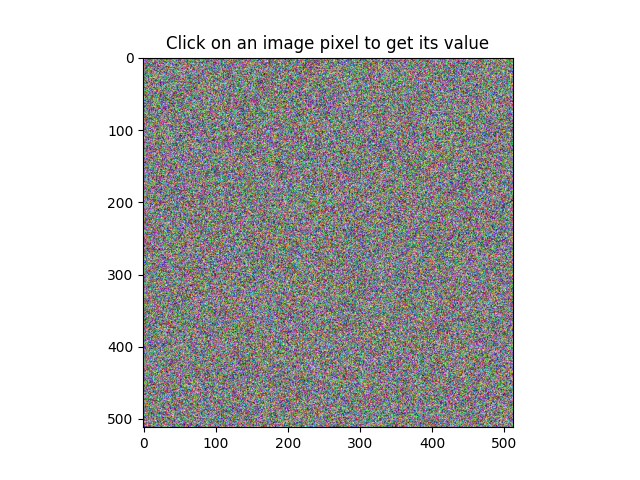

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

# Generate a random image with a specified size (e.g., 512x512 pixels)
image_size = (512, 512, 3)
random_image = np.random.rand(*image_size)

# Create a function to display and interact with the image
def click_event(event):
    if event.button == 1:
        x, y = int(event.xdata), int(event.ydata)
        pixel_value = random_image[y, x]  # Get the pixel value at the clicked point
        print(f"Pixel value at ({x}, {y}): {pixel_value:.4f}")

# Display the random image
fig, ax = plt.subplots()
ax.imshow(random_image, cmap='gray', vmin=0, vmax=1)  # Assuming grayscale image
ax.set_title('Click on an image pixel to get its value')
fig.canvas.mpl_connect('button_press_event', click_event)

plt.show()


# Gaussian kernel multiplier

In [7]:
def replace_convlayers_with_gaussian_convnext(model, gaussian_kernel):
    for n, module in model.named_children():
        if len(list(module.children())) > 0:
            multiply_convlayers_with_gaussian_convnext(module, gaussian_kernel)
        if isinstance(module, nn.Conv2d):
            if module.weight.shape[-1] == 7: # if its a 7x7 kernel
                pdb.set_trace()
                module.weight = torch.nn.Parameter(module.weight * gaussian_kernel * 50)
    return model

def apply_gaussian_to_stage(original_model, gaussian_kernel, stage):
    if stage == 1:
        print('stage', stage)
        for child in list(original_model.features.children())[:2]:
            multiply_convlayers_with_gaussian_convnext(child, gaussian_kernel)
    elif stage == 2:
        print('stage', stage)
        for child in list(original_model.features.children())[2:4]:
            multiply_convlayers_with_gaussian_convnext(child, gaussian_kernel)
    elif stage == 3:
        print('stage', stage)
        for child in list(original_model.features.children())[4:6]:
            multiply_convlayers_with_gaussian_convnext(child, gaussian_kernel)
    elif stage == 4:
        print('stage', stage)
        for child in list(original_model.features.children())[6:8]:
            multiply_convlayers_with_gaussian_convnext(child, gaussian_kernel)

def generate_gaussian_kernel(out_channels, size, sigma=1.0):
    """Generates a 2D Gaussian kernel."""
    kernel = np.fromfunction(
        lambda x, y: (1 / (2 * np.pi * sigma**2)) * np.exp(-((x - (size-1)/2)**2 + (y - (size-1)/2)**2) / (2 * sigma**2)),
        (size, size)
    )
    kernel = torch.Tensor(kernel)
    kernel /= kernel.sum()
    # Reshape to depthwise convolutional weight shape [out_channels, in_channels, height, width]
    kernel = kernel.expand(out_channels, 1, size, size)
    return kernel

kernel = generate_gaussian_kernel(out_channels=1, size=7, sigma=1.0)

print(kernel.squeeze().cpu().numpy().shape)
print(kernel.sum())
print('max', kernel.max())
print('min', kernel.min())
print(kernel.shape)

# apply_gaussian_to_stage(net.module._net, kernel.cuda(), stage=2)
# apply_gaussian_to_stage(net.module._net, kernel.cuda(), stage=3)
# apply_gaussian_to_stage(net.module._net, kernel.cuda(), stage=4)

(7, 7)
tensor(1.)
max tensor(0.1592)
min tensor(1.9652e-05)
torch.Size([1, 1, 7, 7])


In [11]:
x = torch.tensor([[5, 4, 5, 4, 5],
              [5, 4, 2, 4, 5],
              [5, 2, 3, 2, 5],
              [5, 4, 2, 4, 5],
              [5, 4, 5, 4, 5]])

kernel = generate_gaussian_kernel(out_channels=1, size=5, sigma=1.0)

print(x)
print(kernel)
print(x * kernel)

tensor([[5, 4, 5, 4, 5],
        [5, 4, 2, 4, 5],
        [5, 2, 3, 2, 5],
        [5, 4, 2, 4, 5],
        [5, 4, 5, 4, 5]])
tensor([[[[0.0030, 0.0133, 0.0219, 0.0133, 0.0030],
          [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
          [0.0219, 0.0983, 0.1621, 0.0983, 0.0219],
          [0.0133, 0.0596, 0.0983, 0.0596, 0.0133],
          [0.0030, 0.0133, 0.0219, 0.0133, 0.0030]]]])
tensor([[[[0.0148, 0.0532, 0.1097, 0.0532, 0.0148],
          [0.0665, 0.2385, 0.1966, 0.2385, 0.0665],
          [0.1097, 0.1966, 0.4863, 0.1966, 0.1097],
          [0.0665, 0.2385, 0.1966, 0.2385, 0.0665],
          [0.0148, 0.0532, 0.1097, 0.0532, 0.0148]]]])


# Resnet check

In [43]:
args.net = 'resnet18'

# Create a convolutional network based on arguments and add 1x1 conv layer
feature_net, add_on_layers, pool_layer, classification_layers, num_prototypes = get_network(len(classes), args, root=root)
   
# Create a PIP-Net
net = PIPNet(num_classes=len(classes),
                    num_prototypes=num_prototypes,
                    feature_net = feature_net,
                    args = args,
                    add_on_layers = add_on_layers,
                    pool_layer = pool_layer,
                    classification_layers = classification_layers,
                    num_parent_nodes = len(root.nodes_with_children()),
                    root = root
                    )
net = net.to(device=device)
net = nn.DataParallel(net, device_ids = device_ids)    
# net.load_state_dict(checkpoint['model_state_dict'],strict=True)
net.eval()
print()
# criterion = nn.NLLLoss(reduction='mean').to(device)

Number of prototypes:  512
----------Prototypes per descendant: 4----------
Assigned 72 protos to node root
Assigned 16 protos to node 052+053
Assigned 56 protos to node 004+086
Assigned 12 protos to node 053+050
Assigned 16 protos to node 004+032
Assigned 40 protos to node 086+045
Assigned 8 protos to node 050+051
Assigned 12 protos to node 032+033
Assigned 36 protos to node 045+101
Assigned 8 protos to node 033+031
Assigned 16 protos to node 045+003
Assigned 20 protos to node 101+023
Assigned 12 protos to node 003+002
Assigned 8 protos to node 101+100
Assigned 12 protos to node 023+025
Assigned 8 protos to node 002+001
Assigned 8 protos to node 025+024



In [44]:
print(args.net)
print()
for name,param in net.module._net.named_parameters():
    print(name)

resnet18

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer3.0.conv1.weight
layer3.0.bn1.weight
layer3.0.bn1.bias
layer3.0.conv2.weight
layer3.0.bn2.weight
layer3.0.bn2.bias
layer3.0.downsample.0.weight
layer3.0.downsample.1.weight
layer3.0.downsample.1.bias
layer3.1.conv1.weight
layer3.1.bn1.weight
layer3.1.bn1.bias
layer3.1.conv2.weight
layer3.1.bn2.weight
layer3.1.bn2.bias
layer4.0.conv1.weight
layer4.0.bn1.weight
layer4.0.bn1.bias
layer4.

In [40]:
print(args.net)
print()
for name,param in net.module._net.named_parameters():
    print(name)

resnet34

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.2.conv1.weight
layer1.2.bn1.weight
layer1.2.bn1.bias
layer1.2.conv2.weight
layer1.2.bn2.weight
layer1.2.bn2.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.1.conv2.weight
layer2.1.bn2.weight
layer2.1.bn2.bias
layer2.2.conv1.weight
layer2.2.bn1.weight
layer2.2.bn1.bias
layer2.2.conv2.weight
layer2.2.bn2.weight
layer2.2.bn2.bias
layer2.3.conv1.weight
layer2.3.bn1.weight
layer2.3.bn1.bias
layer2.3.conv2.weight
layer2.3.bn2.weight
layer2.3.bn2.bias
layer3.0.conv1.weight
layer3.0.b

In [42]:
print(args.net)
print()
for name,param in net.module._net.named_parameters():
    print(name)

resnet50

conv1.weight
bn1.weight
bn1.bias
layer1.0.conv1.weight
layer1.0.bn1.weight
layer1.0.bn1.bias
layer1.0.conv2.weight
layer1.0.bn2.weight
layer1.0.bn2.bias
layer1.0.conv3.weight
layer1.0.bn3.weight
layer1.0.bn3.bias
layer1.0.downsample.0.weight
layer1.0.downsample.1.weight
layer1.0.downsample.1.bias
layer1.1.conv1.weight
layer1.1.bn1.weight
layer1.1.bn1.bias
layer1.1.conv2.weight
layer1.1.bn2.weight
layer1.1.bn2.bias
layer1.1.conv3.weight
layer1.1.bn3.weight
layer1.1.bn3.bias
layer1.2.conv1.weight
layer1.2.bn1.weight
layer1.2.bn1.bias
layer1.2.conv2.weight
layer1.2.bn2.weight
layer1.2.bn2.bias
layer1.2.conv3.weight
layer1.2.bn3.weight
layer1.2.bn3.bias
layer2.0.conv1.weight
layer2.0.bn1.weight
layer2.0.bn1.bias
layer2.0.conv2.weight
layer2.0.bn2.weight
layer2.0.bn2.bias
layer2.0.conv3.weight
layer2.0.bn3.weight
layer2.0.bn3.bias
layer2.0.downsample.0.weight
layer2.0.downsample.1.weight
layer2.0.downsample.1.bias
layer2.1.conv1.weight
layer2.1.bn1.weight
layer2.1.bn1.bias
layer2.